<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_10_ED01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Actividad 01, Decamiento radioactivo
1. Resolver la siguiente ecuacion diferencial, empleando el metodo de Euler. Deberá generar el código en markdown con la explicación del método y las deducciones.

\begin{equation}
\frac{\mathrm{d}N}{\mathrm{d}t}=-λ N
\end{equation}


# Actividad 02, Oscilador armónico
2. Resolver la siguiente ecuación difirencial, empleando el metodo de Euler. interprete su resultado.

\begin{equation}   
m \frac{d^2x}{dt^2}+kx + bv=0
\end{equation}


Para el oscilador aromónico anterior, escribir un programa con extension py que permita dar escribir la velocidad y la posicion
como funcion del tiempo.

La ejecucion del programa deberá ser de la siguiente forma:

python oscilador_armonico.py

al ejecutarse, el programa almacenará en memoría en el directorio data, la velocidad y la posición.

    data/velocidad.txt
    data/posicion.txt

Puede utlizar el siguiente código como guía:

```python
#!/usr/bin/env python3
def euler(x):
    
    return y, v

def save_file(path):
    return


if __name__=='__main__':
    y, v = euler(x)
    save_file(path)

```


In [6]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# **1. Deducción método de Euler**


Considerando la E.D.O de primer orden:

\begin{equation}
\frac{dy}{dt} = f(t, y)
\end{equation}

Donde $y(t_0) = y_0$ es la condición inicial en el tiempo $t_0$.

Se busca aproximar la solución $y(t)$ en puntos discretos $t_0, t_1, t_2, \ldots, t_n$ con incrementos de tiempo uniformes $\Delta t = t_{i+1} - t_i$.

Una forma de acercarse a la solución es mediante el método de euler, utilizando la aproximación de la derivada:


\begin{equation}
\frac{dy}{dt} \approx \frac{y_{i+1} - y_i}{\Delta t}
\end{equation}



Sustituyendo esto en la ecuación diferencial, obtenemos:


\begin{equation}
\frac{y_{i+1} - y_i}{\Delta t} = f(t_i, y_i)
\end{equation}

Despejando $y_{i+1}$, obtenemos:

\begin{equation}
y_{i+1} = y_i + \Delta t \cdot f(t_i, y_i)
\end{equation}



In [7]:
# Función decaimiento exponencial

def deca(a,N):
  return -a*N

In [8]:
k= 100
t_e= np.linspace(0,10,k)

In [9]:

N_ = np.zeros(len(t_e))
f = np.zeros(len(t_e))
dy = 0.01
lamb= 0.2
N_[0] = 100 # con una única condición inicial

for i in range(0,len(t_e)-1):
  N_[i+1]= N_[i]-(t_e[i+1]-t_e[i])*lamb*N_[i]  # en este caso el menos sale de la edo dada

In [10]:
teorica = np.exp(-lamb*t_e)*N_[0]

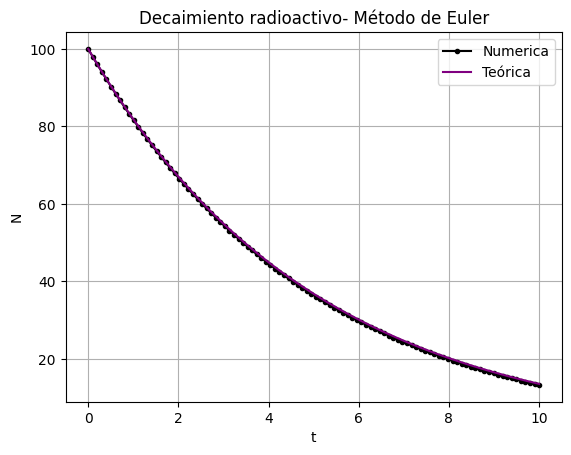

In [11]:
# Gráfica

plt.plot(t_e,N_,"k.-",label="Numerica")
plt.plot(t_e,teorica,c="purple",label="Teórica")
plt.title("Decaimiento radioactivo- Método de Euler")
plt.xlabel("t")
plt.ylabel("N")
plt.legend()
plt.grid()

# **2. Oscilador armónico**

In [12]:
# Condiciones iniciales

b = 0.1
m = 1
k = 2

params = (b,m,k)

In [13]:
y_ = np.array([2,0.001])
t_ = np.linspace(0,10,100)

In [14]:
def funcion(t,y,params):

  gamma = params[0]/params[1]
  w = params[2]/params[1]

  dy = y[1]
  dv = -gamma*y[1]-w**2*y[0]

  return np.array([dy,dv])

In [15]:
funcion(t_,y_,params)

array([ 1.0000e-03, -8.0001e+00])

In [16]:

def euler(y,t):
  pos = np.zeros(len(t))
  v = np.zeros(len(t))
  pos[0] = y[0]
  v[0] = y[1]

  for i in range(0,len(t)-1):
    h = t[i+1]-t[i]
    pos[i+1] = pos[i] + h * funcion(t[i],[pos[i],v[i]],params)[0] # evoulución,t,v
    v[i+1] = v[i] + h * funcion(t[i],[pos[i],v[i]],params)[1]
  return pos,v

In [17]:
vector = euler(y_,t_)

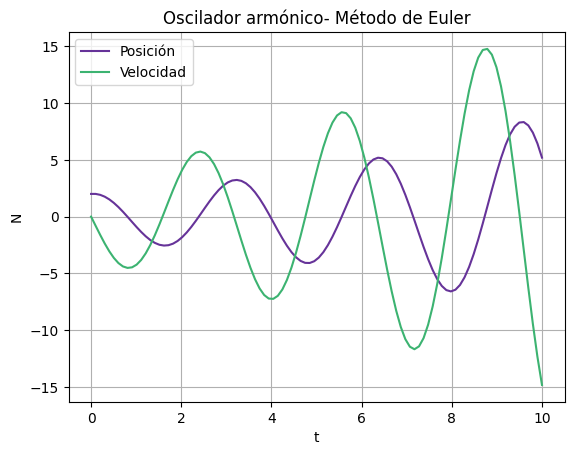

In [18]:
# Gráfica

plt.plot(t_,vector[0],label="Posición",c="rebeccapurple")
plt.plot(t_,vector[1],label="Velocidad",c="mediumseagreen")
plt.title("Oscilador armónico- Método de Euler")
plt.legend()
plt.xlabel("t")
plt.ylabel("N")
plt.grid()

# **Método de Rungen-Kutta (Decaimiento radioactivo)**

* Se compara el método de euler con el método de rungen-kutta examinando la convergencia del decaimiento radioactivo.

In [19]:
a = 0.2

In [20]:
# Decaimiento exponencial

def fun(t,y):
  f = -a*y
  return f

In [21]:
# Condiciones iniciales

tini = 0
h = 0.01
N = 500
tmax = N*h

t = np.linspace(0,tmax,N)
y = np.zeros(len(t))

In [22]:
t[0]= tini
y[0]= 100

In [23]:
for i in range(0,len(t)-1):
  k1= fun(t[i],y[i])
  k2= fun(t[i]+h/2,y[i]+h/2*k1)
  k3= fun(t[i]+h/2,y[i]+h/2*k2)
  k4= fun(t[i]+h/2,y[i]+h/2*k3)
  y[i+1] = y[i]+h/6*(k1+2*k2+2*k3+k4)

In [24]:
sol_teorica = np.exp(-a*t)*y[0]

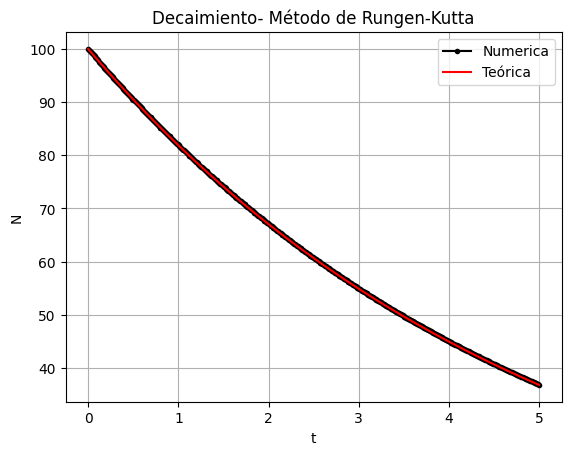

In [25]:
# Gráfica

fig, ax= plt.subplots(nrows=1,ncols=1)
ax.plot(t,y,"k.-",label="Numerica")
ax.plot(t,sol_teorica,c="r",label="Teórica")
ax.legend()
ax.set_xlabel("t")
ax.set_ylabel("N")
ax.set_title("Decaimiento- Método de Rungen-Kutta")
ax.grid()

# **Método de Rungen-Kutta (oscilador armónico)**

* Se compara el método de euler con el método de rungen-kutta examinando la convergencia del oscilador armónico.

In [26]:
# Condiciones iniciales

b = 0.1
m = 1
k = 2

params = (b,m,k)

In [27]:
y_r = np.array([2,0.001])

In [28]:
def funcion(t,y,params):

  gamma = params[0]/params[1]
  w = params[2]/params[1]

  dy = y[1]
  dv = -gamma*y[1]-w**2*y[0]

  return np.array([dy,dv])

In [29]:
h = 0.01
N = 1000
tmax_ = N*h

t_r = np.arange(0,int(tmax_),h)
pos_ceros = np.zeros(len(t_r))
velocidad = np.zeros(len(t_r))

In [30]:
pos_ceros[0] = y_r[0]
velocidad[0] = y_r[1]

In [31]:
def RK4(func, t, y, h, params):
    k1 = func(t, y, params)
    k2 = func(t + h/2, y + h/2*k1, params)
    k3 = func(t + h/2, y + h/2*k2, params)
    k4 = func(t + h, y + h*k3, params)
    return y + h/6 * (k1 + 2*k2 + 2*k3 + k4)

In [32]:
for i in range(0,len(t_r)-1):
    pos_ceros[i+1], velocidad[i+1] = RK4(funcion, t_r[i], np.array([pos_ceros[i], velocidad[i]]), h, params)


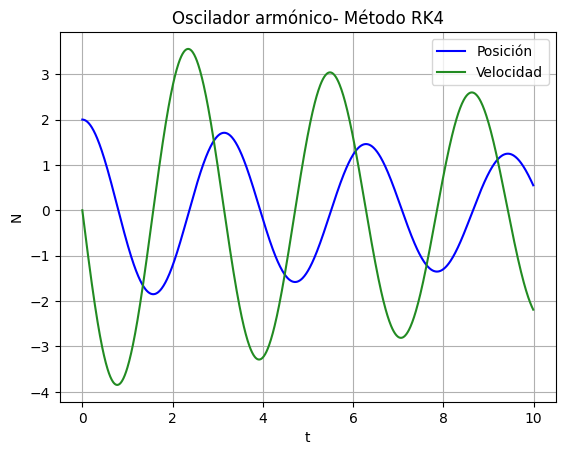

In [33]:
# Gráfica

plt.plot(t_r, pos_ceros,c="b", label='Posición')
plt.plot(t_r, velocidad,c="forestgreen", label='Velocidad')
plt.title("Oscilador armónico- Método RK4")
plt.xlabel("t")
plt.ylabel("N")
plt.legend()
plt.grid()